In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("housing.csv")
df
x = df.drop(["median_house_value"],axis=1)
y = df["median_house_value"]
x = pd.get_dummies(x,columns=["ocean_proximity"])

In [26]:
x.isnull().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2
,random_state=42)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
x_train_impute = imputer.fit_transform(x_train)
x_test_impute = imputer.transform(x_test)


In [28]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [29]:
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['sqrt', 'log2']
}

In [30]:
from sklearn.model_selection import GridSearchCV
regressorcv = GridSearchCV(regressor,param_grid=parameter,scoring='neg_mean_squared_error',cv=5)

In [31]:
regressorcv.fit(x_train_impute,y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': ['sqrt', 'log2'], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [32]:
regressorcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'log2',
 'splitter': 'best'}

In [33]:
regressorcv.best_score_

np.float64(-4739768101.876701)

In [34]:
y_pred = regressorcv.predict(x_test_impute)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2:", r2)

RMSE: 64428.71711764309
R2: 0.683224118702416


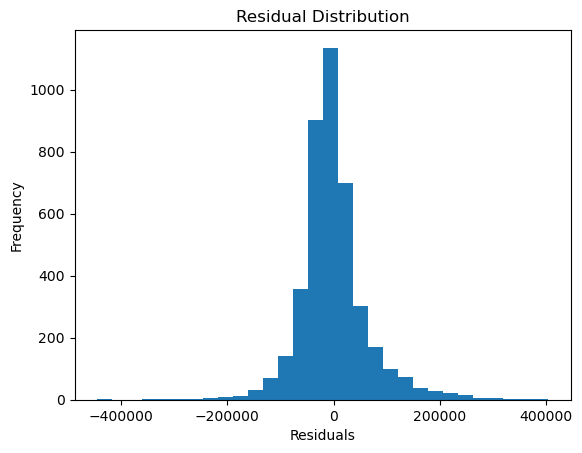

In [36]:
#visualization
residuals = y_test - y_pred
plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()